# Moment of Inertia of a Football

The moment of inertia of a football can be calculated as follows:

The football is a prolate spheroid with semi-axes $a$ and $c$.  For an American football, the semi-axes are $a = 11.5$ cm and $c = 19.0$ cm. The mass of the football is $m = 0.4$ kg, and the thickness of the leather is $t = 0.5$ cm.

The moment of inertia of a uniform density SOLID prolate spheroid is given by

$$I = \frac{2}{5} m c^2 \left(1 + \frac{1}{2} \left(\frac{a}{c}\right)^2 \ln\left(\frac{1 + e}{1 - e}\right)\right)$$

where $m$ is the mass of the football and $e = \sqrt{1 - \frac{a^2}{c^2}}$.  

However, the football is not a solid prolate spheroid!

## Calculation of the Moment of Inertia

The moment of inertia of the football is calculated as follows:

A prolate spheroid is an ellipse which is rotated about its major axis.  The length of the major axis is $2c$, and the length of the minor axis is $2a$.  Thus, the equation of the surface of the prolate spheroid is given by

$$\frac{x^2}{a^2} + \frac{y^2}{a^2} + \frac{z^2}{c^2} = 1$$

In spherical coordinates, we have that:

$$x = r \sin\theta \cos\phi$$
$$y = r \sin\theta \sin\phi$$
$$z = r \cos\theta$$

Substituting these into the equation of the prolate spheroid, we have that:

$$\frac{r^2 \sin^2\theta \cos^2\phi}{a^2} + \frac{r^2 \sin^2\theta \sin^2\phi}{a^2} + \frac{r^2 \cos^2\theta}{c^2} = 1$$

Simplifying, we have that:

$$\frac{r^2}{a^2} \sin^2\theta + \frac{r^2}{c^2} \cos^2\theta = 1$$

Solving for $r^2$, we have that:

$$r^2 = \frac{a^2 c^2}{c^2 \sin^2\theta + a^2 \cos^2\theta}$$

$$r = \frac{ac}{\sqrt{c^2 \sin^2\theta + a^2 \cos^2\theta}$$

Let's calculate the surface area of the prolate spheroid. 

The area of the prolate spheroid is given by

$$A = \int_0^{2\pi} \int_0^\pi r^2 \sin\theta d\theta d\phi$$

$$= 2\pi \int_0^\pi r^2 \sin\theta d\theta$$ 

Substituting in the expression for $r^2$, we have that

$$A = 2\pi \int_0^\pi \frac{a^2 c^2}{c^2 \sin^2\theta + a^2 \cos^2\theta} \sin\theta d\theta$$

This integral is not easy to solve!  The result, using Mathematica, is:

$$A = 2\pi a^2 + \frac{2 \pi a c^2}{\sqrt{c^2-a^2}} \arcsin\left(\frac{\sqrt{c^2-a^2}}{c}\right)$$

Using that $e = \frac{\sqrt{c^2-a^2}}{c}$, we have that

$$A = 2\pi a^2 + \frac{2 \pi a c}{e} \arcsin\left(e\right)$$

(Note that the limit of $\frac{arcsin(e)}{e}$ as $e \rightarrow 0$ is 1, so the surface area of a sphere is recovered in the limit as $e \rightarrow 0$.)

## Moment of Inertia

We can calculate the diagonal elements of the moment of intertia tensor as follows:

$$I_{xx} = \int \left(y^2 + z^2\right) dm$$
$$I_{yy} = \int \left(x^2 + z^2\right) dm$$
$$I_{zz} = \int \left(x^2 + y^2\right) dm$$

where $dm = \rho dV$ is the mass element, and $\rho$ is the density of the football.  The density of the football is given by

$$\rho = \frac{m}{V}$$

where $V$ is the volume of the football.  The volume of the football is given by

$$V = A*t$$

where $A$ is the surface area of the football and $t$ is the thickness of the leather.  Thus, the density is given by

$$\rho = \frac{m}{A t}$$

## Calculation of $I_{xx}$

We can calculate the moment of inertia $I_{xx}$ as follows:

$$I_{xx} = \int \int \int \left(y^2 + z^2\right) dm$$

Substituting in the expression for $dm$, we have that

$$I_{xx} = t \int \int \left(y^2 + z^2\right) \rho dA$$

Switching to spherical coordinates, we have that

$$I_{xx} = t \int \int \left(r^2 \sin^2\theta \sin^2\phi + r^2 \cos^2\theta\right) \rho r^2 \sin\theta d\theta d\phi$$

Substituting in the expression for $r^2$, we have that

$$I_{xx} = t \int \int \left(\frac{a^2 c^2 \sin^2\theta \sin^2\phi}{c^2 \sin^2\theta + a^2 \cos^2\theta} + \frac{a^2 c^2 \cos^2\theta}{c^2 \sin^2\theta + a^2 \cos^2\theta}\right) \rho \frac{a^2 c^2}{c^2 \sin^2\theta + a^2 \cos^2\theta} \sin\theta d\theta d\phi$$

Somehow, I feel like a numerical solution is going to be necessary!!!







In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
# From https://operations.nfl.com/media/4693/2020-nfl-rulebook.pdf
# Length = 11.0 to 11.25 inches
# Circumference = 28.0 to 28.5 inches long side
# Circumference = 21.0 to 21.25 inches short side
# Weight = 14.0 to 15.0 ounces

c = 11.125/2.0*2.54e-2
a = 21.125/(2.0*np.pi)*2.54e-2
print('c (m) =', c)
print('a (m) =', a)
m = 14.5*0.0283495
print('m (kg) =', m)
t = 0.5e-2

# testing - spherical shell
#c = 1
#a = 0.9999999*c
#m = 1
#t =0.0001

# testing - thin rod
#c = 1
#a = 0.1*c
#m = 1
#t =0.001

# Calculate e
e = np.sqrt(1 - a**2/c**2)

# Calculate the surface area
A = 2*np.pi*a**2 + 2*np.pi*a*c/e*np.arcsin(e)

# Calculate the volume
V = A*t

# Calculate the density
rho = m/V

print('e =', e)
print('A (m^2) =', A)
print('V (m^3) =', V)
print('rho (kg/m^3) =', rho)

c (m) = 0.14128749999999998
a (m) = 0.08539856358953374
m (kg) = 0.41106775
e = 0.7966573958970498
A (m^2) = 0.13353760781172502
V (m^3) = 0.0006676880390586251
rho (kg/m^3) = 615.6584002606447


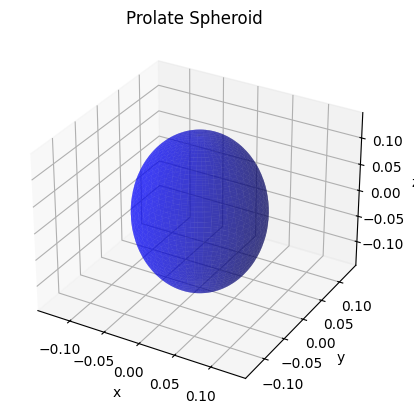

In [4]:
# Plot the prolate spheroid

# Number of points

n = 1000

# Create the grid

theta = np.linspace(0, np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
theta, phi = np.meshgrid(theta, phi)

# Calculate the position of the grid points

x = a*np.sin(theta)*np.cos(phi)
y = a*np.sin(theta)*np.sin(phi)
z = c*np.cos(theta)

# Plot the prolate spheroid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Prolate Spheroid')
ax.set_xlim(-c, c)
ax.set_ylim(-c, c)
ax.set_zlim(-c, c)
plt.show()

In [14]:
# Calculate the moment of inertia - Ixx

# Number of points
n = 1000

# Calculate the integral
Ixx = 0
dtheta = np.pi/n
dphi = 2*np.pi/n
for i in range(n):
    for j in range(n):
            theta = np.pi*i/n
            phi = 2*np.pi*j/n
            r = c*a/np.sqrt(c**2*np.sin(theta)**2 + a**2*np.cos(theta)**2)
            Ixx += t*(r**2*np.sin(theta)**2*np.sin(phi)**2 + r**2*np.cos(theta)**2)*rho*r**2*np.sin(theta)*dtheta*dphi
            
print('Ixx =', Ixx)

Ixx = 0.0032213205823612865


In [15]:
# Calculate the moment of inertia - Iyy

# Calculate the integral
Iyy = 0
for i in range(n):
    for j in range(n):
            theta = np.pi*i/n
            phi = 2*np.pi*j/n
            r = c*a/np.sqrt(c**2*np.sin(theta)**2 + a**2*np.cos(theta)**2)
            Iyy += t*(r**2*np.sin(theta)**2*np.cos(phi)**2 + r**2*np.cos(theta)**2)*rho*r**2*np.sin(theta)*dtheta*dphi
            
print('Iyy =', Iyy)

Iyy = 0.0032213205823612826


In [16]:
# Calculate the moment of inertia - Izz

# Calculate the integral
Izz = 0
for i in range(n):
    for j in range(n):
            theta = np.pi*i/n
            phi = 2*np.pi*j/n
            r = c*a/np.sqrt(c**2*np.sin(theta)**2 + a**2*np.cos(theta)**2)
            Izz += t*(r**2*np.sin(theta)**2*np.cos(phi)**2 + r**2*np.sin(theta)**2*np.sin(phi)**2)*rho*r**2*np.sin(theta)*dtheta*dphi
          
print('Izz =', Izz)

Izz = 0.002002316694263955


In [17]:
# Calculate the moment of inertia - Ixy

# Calculate the integral
Ixy = 0
for i in range(n):
    for j in range(n):
            theta = np.pi*i/n
            phi = 2*np.pi*j/n
            r = c*a/np.sqrt(c**2*np.sin(theta)**2 + a**2*np.cos(theta)**2)
            Ixy += t*(r**2*np.sin(theta)**2*np.sin(phi)*np.cos(phi) + r**2*np.cos(theta)**2*np.sin(phi)*np.cos(phi))*rho*r**2*np.sin(theta)*dtheta*dphi
            
print('Ixy =', Ixy)

Ixy = 2.1728644983910302e-20


In [18]:
# Calculate the moment of inertia from the original formula for solid prolate spheroid

I = 2/5*m*c**2*(1 + 1/2*(a/c)**2*np.log((1 + e)/(1 - e)))

#print('I =', I)

I_numerical = np.array([[Ixx, 0, 0], [0, Iyy, 0], [0, 0, Izz]])

print('I_numerical =', I_numerical)

print('Ratio of I_zz/I_xx =', Izz/Ixx)

I_numerical = [[0.00322132 0.         0.        ]
 [0.         0.00322132 0.        ]
 [0.         0.         0.00200232]]
Ratio of I_zz/I_xx = 0.6215825600307748


In [19]:
# Code Testing - spherical shell

# if a = c, then the prolate spheroid is a spherical shell
# the moment of inertia of a spherical shell is given by I = 2/3 m c^2

# Question:  What would be the radius of the sphere, given the volume of the prolate spheroid?
# Answer: V = t * A = t * 4 * pi * r_sphere^2
# r_sphere = sqrt(V/(t*4*pi))

r_sphere = np.sqrt(V/(t*4*np.pi))

I_expected = 2/3*m*(r_sphere)**2
I_actual_z = I_numerical[2,2]
I_actual_x = I_numerical[0,0]
I_actual_y = I_numerical[1,1]

print('I_expected =', I_expected)
print('I_actual_z =', I_actual_z)
print('I_actual_x =', I_actual_x)
print('I_actual_y =', I_actual_y)

I_expected = 0.0029121643083816007
I_actual_z = 0.002002316694263955
I_actual_x = 0.0032213205823612865
I_actual_y = 0.0032213205823612826


In [20]:
# Code Testing - thin rod

# if a = 0, then the prolate spheroid is a thin rod
# the moment of inertia of a thin rod is given by I = 1/12 m c^2

I_expected = 1/12*m*c**2
I_actual_z = I_numerical[2,2]
I_actual_x = I_numerical[0,0]
I_actual_y = I_numerical[1,1]

print('I_expected =', I_expected)
print('I_actual_z =', I_actual_z)
print('I_actual_x =', I_actual_x)
print('I_actual_y =', I_actual_y)

I_expected = 0.0006838166027416633
I_actual_z = 0.002002316694263955
I_actual_x = 0.0032213205823612865
I_actual_y = 0.0032213205823612826


In [21]:
print(I_expected/I_actual_x)

0.21227834524945458
